# У меня тут только начало. Я немного запуталась. Задам несколько вопросов на занятии

## Диплом
### Козел А.Г. 
8.05.2023

Набор данных https://www.kaggle.com/datasets/uciml/student-alcohol-consumption
Данные были получены при опросе учащихся курсов математики и португальского языка в общеобразовательной школе. Он содержит много интересной социальной, гендерной и учебной информации о студентах. Вы можете использовать его для некоторых EDA или попытаться предсказать итоговую оценку учащихся.



### Описание 
* school - школа ученика (двоичный код: «GP» — Габриэль Перейра или «MS» — Мусиньо да Силвейра)
* sex - пол студента (бинарный: "F" - женский или "M" - мужской)
* age - возраст студента (числовое: от 15 до 22)
* address -  тип домашнего адреса студента (двоичный: 'U' - городской или 'R' - сельский)
* famsize - размер семьи (двоичный: «LE3» — меньше или равно 3 или «GT3» — больше 3)
* Pstatus - статус совместного проживания родителей (двоичный: «T» — совместное проживание или «A» — отдельно)
* Medu -  образование матери (числовое: 0 - нет, 1 - начальное образование (4 класс), 2 - 5-9 класс, 3 - среднее или 4 - высшее)
* Fedu - образование отца (числовое: 0 - нет, 1 - начальное образование (4 класс), 2 - 5-9 класс, 3 - среднее или 4 - высшее)
* Mjob - работа матери (номинальное значение: «учитель», «медицина», «государственная служба» (например, административная или полицейская), «домашний» или «другой»)
* Fjob -  работа отца (номинальное: «учитель», «медицина», «государственная служба» (например, административная или полицейская), «домашний» или «другой»)
* reason - причина выбора этой школы (номинал: близко к "дому", "репутация школы", предпочтение "курса" или "другое")
* guardian - опекун студента (имя: «мать», «отец» или «другой»)
* traveltime - время в пути от дома до школы (числовое значение: 1 — <15 мин., 2 — от 15 до 30 мин., 3 — от 30 мин. до 1 часа или 4 — >1 часа)
* studytime - еженедельное время обучения (числовое значение: 1 — <2 часов, 2 — от 2 до 5 часов, 3 — от 5 до 10 часов или 4 — >10 часов)
* failures - количество прошлых сбоев класса (числовое: n, если 1<=n<3, иначе 4)
* schoolsup - дополнительная образовательная поддержка (двоичный код: да или нет)
* famsup - семейная образовательная поддержка (двоичный код: да или нет)
* paid - дополнительные платные занятия по предмету курса (математика или португальский язык) (двоичный код: да или нет)
* activities - внеклассные мероприятия (бинарные: да или нет)
* nursery - посещал детский сад (двоичный код: да или нет)
* higher - хочет получить высшее образование (бинарное: да или нет)
* internet - доступ в интернет дома (двоичный: да или нет)
* romantic - с романтическими отношениями (бинарный: да или нет)
* famrel - качество семейных отношений (числовое: от 1 - очень плохо до 5 - отлично)
* freetime - свободное время после школы (числовое: от 1 - очень мало до 5 - очень много)
* goout - встреча с друзьями (число: от 1 - очень низко до 5 - очень высоко)
* Dalc - потребление алкоголя в рабочие дни (числовое значение: от 1 - очень низкое до 5 - очень высокое)
* Walc - потребление алкоголя в выходные дни (числовое значение: от 1 - очень низкое до 5 - очень высокое)
* health - текущее состояние здоровья (числовое: от 1 - очень плохо до 5 - очень хорошо)
* absences -  количество пропусков занятий (числовое: от 0 до 93)


These grades are related with the course subject, Math or Portuguese:

* G1 - класс первого периода (числовые: от 0 до 20)
* G2 - второй класс (числовые: от 0 до 20)
* G3 - итоговая оценка (числовое значение: от 0 до 20, выходное значение)

In [1]:
# Загружаем требуемые библиотеки.
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

C:\Users\37533\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df_mat = pd.read_csv('student-mat.csv', sep=',')
df_por = pd.read_csv('student-por.csv', sep=',')
df = pd.read_csv('student-mat.csv', sep=',')

In [43]:
df = pd.concat([df_mat, df_por], ignore_index= True )

In [12]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [14]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,1044,2,GP,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1044,2,F,591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1044.0,NaN,NaN,NaN,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
address,1044,2,U,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,1044,2,GT3,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,1044,2,T,923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,1044.0,NaN,NaN,NaN,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,NaN,NaN,NaN,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
Mjob,1044,5,other,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,1044,5,other,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

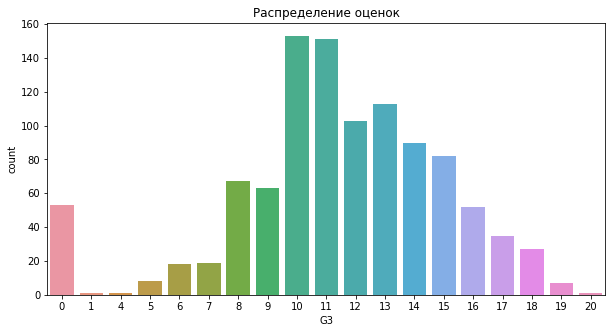

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x = df['G3'])
ax = plt.gca()
plt.title('Распределение оценок')
plt.show()

Text(0.5, 1.0, 'correlation of feature')

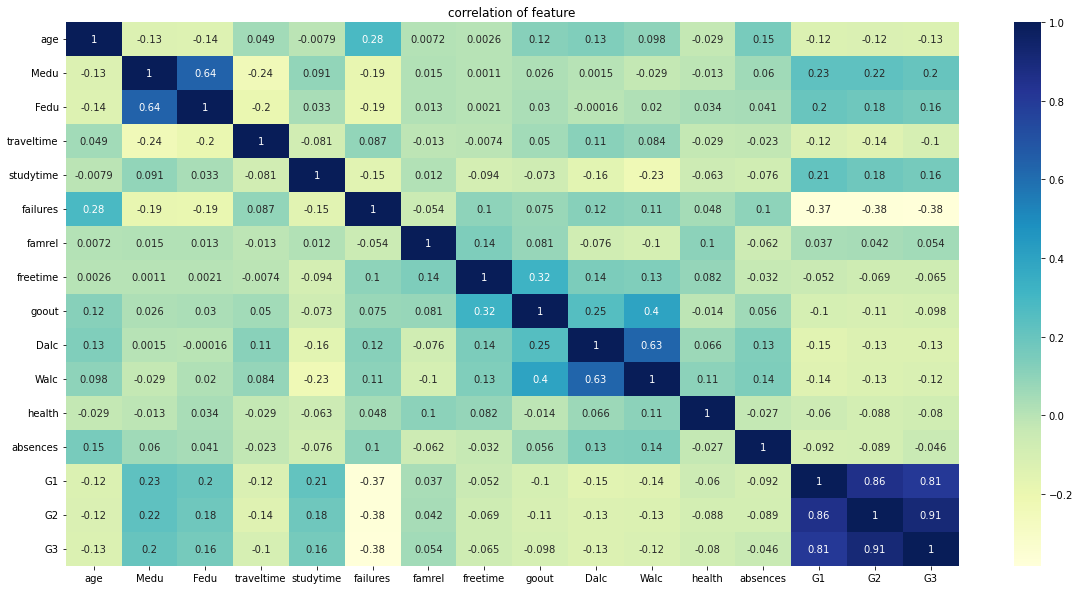

In [46]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True , cmap ="YlGnBu")
plt.title("correlation of feature")

### Рассмотрим влияние каждого параметра на успеваемость и употребление алкоголя. Выберем из них  значимые.
### School

In [17]:
df['school'].value_counts()

GP    772
MS    272
Name: school, dtype: int64

Text(0.5, 1.0, 'Влияние школы на ежедневное употребление алкоголя')

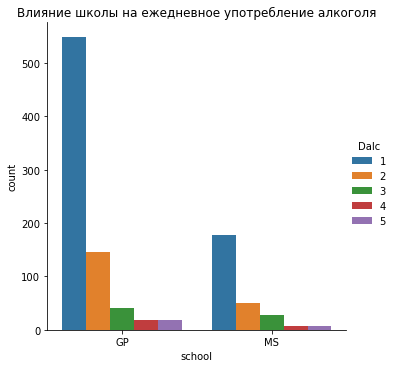

In [41]:
sns.catplot(data = df,hue = 'Dalc', x = 'school', kind='count')
plt.title('Влияние школы на ежедневное употребление алкоголя')

Text(0.5, 1.0, 'Влияние школы на употребление алкоголя по выходным')

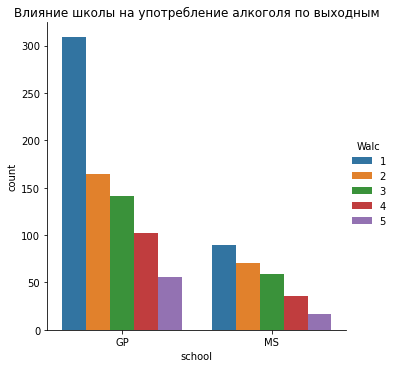

In [38]:
sns.catplot(data = df,hue = 'Walc', x = 'school', kind='count')
plt.title('Влияние школы на употребление алкоголя по выходным')

C:\Users\37533\AppData\Local\Temp\ipykernel_10756\3478606895.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  school_def = (df.groupby(['G3'])['Dalc', 'school']


<Figure size 4000x2000 with 0 Axes>

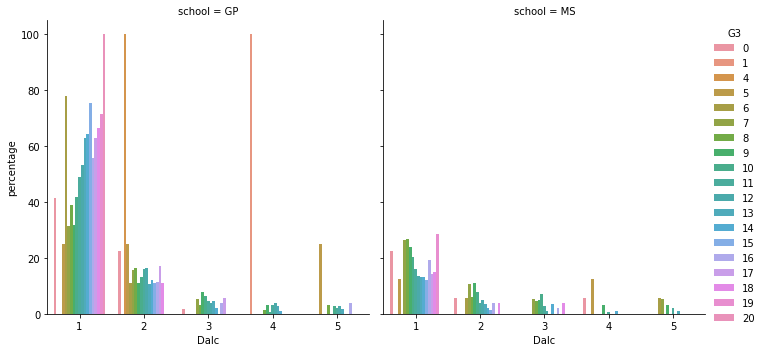

In [30]:
school_def = (df.groupby(['G3'])['Dalc', 'school']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('Dalc'))

ax = sns.catplot(x="Dalc", y="percentage", col = 'school', hue="G3", data=school_def, kind='bar')

C:\Users\37533\AppData\Local\Temp\ipykernel_10756\2216351599.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  school_def = (df.groupby(['G3'])['Walc', 'school']


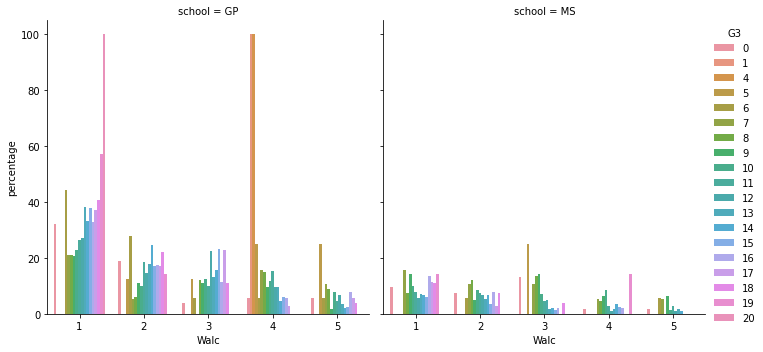

In [21]:
school_def = (df.groupby(['G3'])['Walc', 'school']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('Walc'))

ax = sns.catplot(x="Walc", y="percentage", col = 'school', hue="G3", data=school_def, kind='bar')

### Sex

<AxesSubplot:xlabel='G3'>

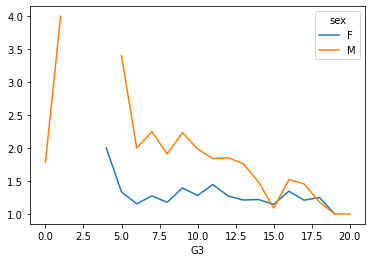

In [22]:
sex_G3_Dalc = pd.pivot_table(df, values = "Dalc", columns = "sex", index = "G3")
sex_G3_Dalc.plot()


<AxesSubplot:xlabel='G3'>

<Figure size 1440x2880 with 0 Axes>

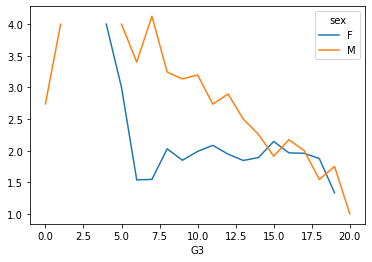

In [23]:
fig = plt.figure(figsize=(20, 40))
fig.set_size_inches(20, 40)
sex_G3_Walc = pd.pivot_table(df, values = "Walc", columns = "sex", index = "G3")
sex_G3_Walc.plot()

C:\Users\37533\AppData\Local\Temp\ipykernel_10756\3760988826.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sex_G3_Dalc = (df.groupby(['G3'])['Dalc', 'sex']


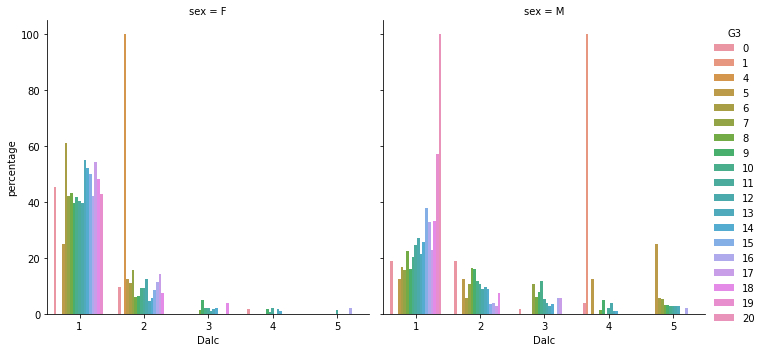

In [24]:
sex_G3_Dalc = (df.groupby(['G3'])['Dalc', 'sex']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('Dalc'))

ax = sns.catplot(x="Dalc", y="percentage", col = 'sex', hue="G3", data=sex_G3_Dalc, kind='bar')

C:\Users\37533\AppData\Local\Temp\ipykernel_10756\3920817661.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sex_G3_Walc  = (df.groupby(['G3'])['Walc', 'sex']


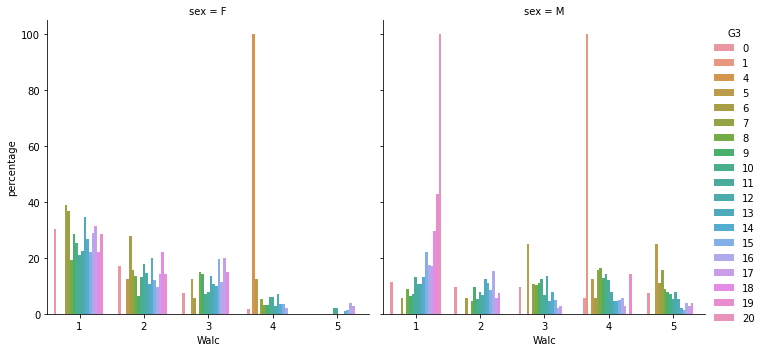

In [25]:
sex_G3_Walc  = (df.groupby(['G3'])['Walc', 'sex']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('Walc'))

ax = sns.catplot(x="Walc", y="percentage", col = 'sex', hue="G3", data=sex_G3_Walc , kind='bar')

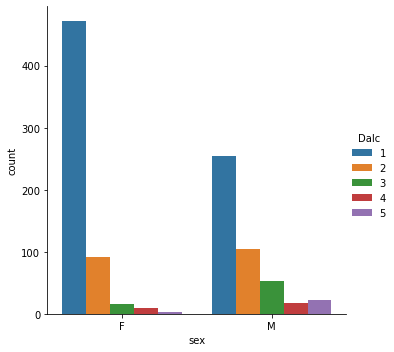

In [26]:
sns.catplot(data = df,hue = 'Dalc', x = 'sex', kind='count')